### Admir Makas
### Vibration Testing Final (Home Take part b)
### 4/26/2016

In [4]:
%matplotlib inline
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy as sm
sm.init_printing(use_latex='mathjax')
from IPython.display import display
from IPython.display import Image
import scipy.linalg as la
import control as ctrl

#### Load . mat file 'mckiddat.mat'

In [5]:
data = sio.loadmat('mckiddat2.mat')

#### Show contents of the .mat file

In [6]:
sio.whosmat('mckiddat2.mat')

[('Freq', (401, 1), 'double'),
 ('IRF_11', (802, 1), 'double'),
 ('IRF_12', (802, 1), 'double'),
 ('IRF_13', (802, 1), 'double'),
 ('Recep', (401, 3), 'double'),
 ('t', (802, 1), 'double')]

#### Define data structures

In [7]:
Freq = data['Freq'];
Recep = data['Recep'];
t = data['t'];
IRF_11 = data['IRF_11'];
IRF_12 = data['IRF_12'];
IRF_13 = data['IRF_13'];

### Plot the given data:

#### Plot for $H_{11}$.

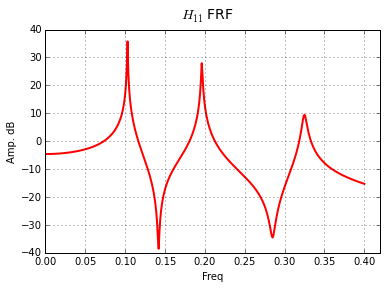

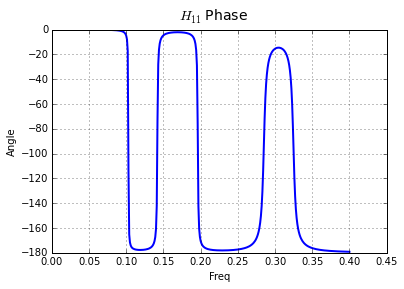

In [8]:
#Plot of H11 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,0])), color='r', linewidth=2.0)
fig.suptitle('$H_{11}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_11 = sp.unwrap(sp.angle(Recep[:,0]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_11, color='b', linewidth=2.0)
fig.suptitle('$H_{11}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

#### Plot for $H_{12}$.

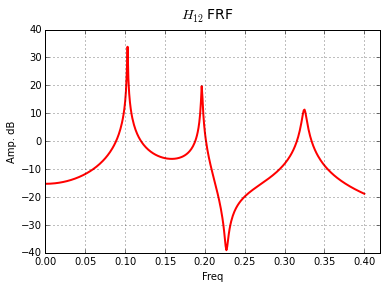

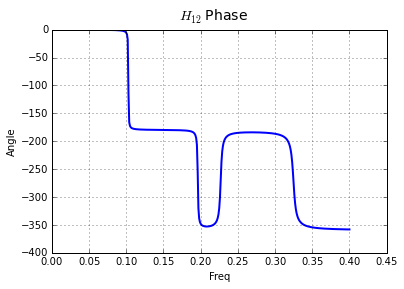

In [9]:
#Plot of H12 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,1])), color='r', linewidth=2.0)
fig.suptitle('$H_{12}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_12 = sp.unwrap(sp.angle(Recep[:,1]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_12, color='b', linewidth=2.0)
fig.suptitle('$H_{12}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

#### Plot for $H_{13}$.

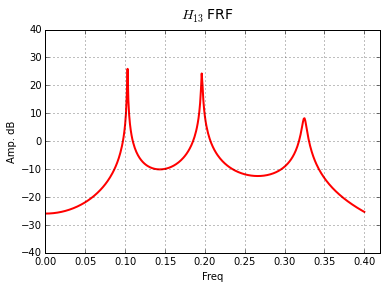

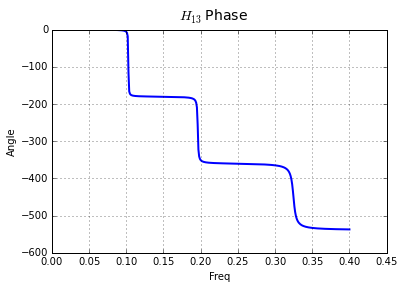

In [10]:
#Plot of H13 FRF
fig = plt.figure()
plt.plot(Freq, 20*np.log10(abs(Recep[:,2])), color='r', linewidth=2.0)
fig.suptitle('$H_{13}$ FRF', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Amp. dB')
plt.axis([0, 0.42, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
phase_13 = sp.unwrap(sp.angle(Recep[:,2]))*(180/sp.pi)
fig = plt.figure()
plt.plot(Freq, phase_13, color='b', linewidth=2.0)
fig.suptitle('$H_{13}$ Phase', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

## Plot time data obtained from the FRF's  

Time data was obtained from vibrations toolbox function 'IRF'

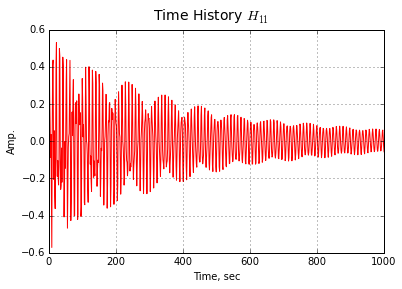

In [18]:
fig = plt.figure()
plt.plot(t, IRF_11, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{11}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.6, 0.6])
#
plt.grid()

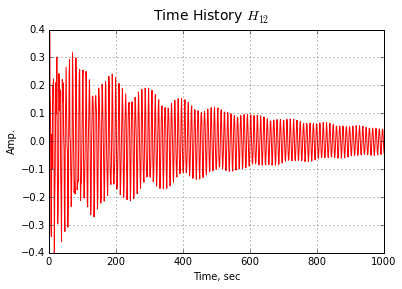

In [19]:
fig = plt.figure()
plt.plot(t, IRF_12, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{12}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.4, 0.4])
#
plt.grid()

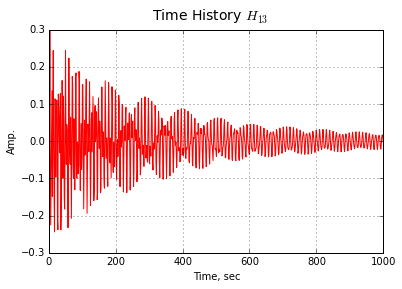

In [20]:
fig = plt.figure()
plt.plot(t, IRF_13, color='r', linewidth=1.0)
#
fig.suptitle('Time History $H_{13}$', fontsize = 14)
plt.xlabel('Time, sec')
plt.ylabel('Amp.')
plt.axis([0, 1000, -0.3, 0.3])
#
plt.grid()

**Define dt for later use:**

In [21]:
dt=t[1]
dt=dt[0]
dt

1.26262626263

## Start with defining all the Markov paramaters available:  

This will yiels a 1 by 3 matrix for each instance.

In [22]:
M=sp.array([IRF_11[:,0], IRF_12[:,0], IRF_13[:,0]]).T
display(M)

array([[  7.12525864e-02,  -8.97410927e-02,  -2.16518762e-04],
       [  5.18989926e-01,  -5.77539023e-03,  -5.08048481e-02],
       [  2.46427900e-01,   3.91599043e-01,   5.87326855e-03],
       ..., 
       [  8.57423581e-03,   1.35764096e-02,   4.55806346e-04],
       [ -2.69818797e-02,  -3.06581263e-02,  -3.86196876e-03],
       [ -7.88591807e-02,  -3.05409593e-02,  -2.28704707e-02]])

In [23]:
M[0]

array([ 0.07125259, -0.08974109, -0.00021652])

In [24]:
M.shape

(802, 3)

**Make alternate markov paramater matrix.**

**Define $H(0)$ matrix from the defined Markov paramaters:**

In [25]:
# Construct H0

#define how many rows you will have (a index)
a=601
#define how many columns you will have (b index)
b=200

#Indeces a and be above do not really give size of
#final matrix. That will be the following
row_i=a-1
column_i=b
display('rows', row_i)
display('columns', column_i)

#get 1st column
H0=M[1:a, :3]
#display(H0)

for i in range(1,b):
    k=1+i
    Hi=M[k:a+i, :3]
    H0=sp.concatenate((H0, Hi), axis=1)
    
display(H0)

display('H0 shape ', H0.shape)

#display(i)
#display(k)
display('Last M row used ', (a+i))

index1=H0.shape[0]
index2=H0.shape[1]
display('indices')
display(index1, index2)

'rows'

600

'columns'

200

array([[  5.18989926e-01,  -5.77539023e-03,  -5.08048481e-02, ...,
         -2.05338420e-01,  -1.10163094e-01,  -2.16730353e-02],
       [  2.46427900e-01,   3.91599043e-01,   5.87326855e-03, ...,
         -1.31297341e-01,  -2.05522105e-01,  -1.21788975e-01],
       [  1.00889291e-01,   1.67477716e-01,   3.44898699e-01, ...,
         -8.91804998e-02,  -1.27251719e-01,  -7.90987728e-02],
       ..., 
       [ -6.88926062e-02,  -7.03284913e-02,  -3.45253269e-02, ...,
          5.16131065e-02,   4.72354197e-02,   1.76584932e-02],
       [ -8.40565378e-02,  -6.53195522e-02,  -2.57784865e-02, ...,
          5.68799054e-02,   3.45001894e-02,   1.45198324e-02],
       [ -4.50144464e-02,  -2.15404052e-02,  -2.15497263e-03, ...,
          8.57423581e-03,   1.35764096e-02,   4.55806346e-04]])

'H0 shape '

(600, 600)

'Last M row used '

800

'indices'

600

600

**Define $H(1)$ matrix from the defined Markov paramaters:**

In [26]:
# Construct H1

#Used same a and b from H0 definition

#Indeces a and be above do not really give size of
#final matrix. That will be the following
row_i=a-1
column_i=b
display('rows', row_i)
display('columns', column_i)

#get 1st column for H1, which will be starting at M(2)
H1=M[2:a+1, :3]

for j in range(1,b):
    k=2+j
    Hj=M[k:a+j+1, :3]
    H1=sp.concatenate((H1, Hj), axis=1)
    
display(H1)

#H1=H1[:index, :index]
display(H1.shape)

'rows'

600

'columns'

200

array([[ 0.2464279 ,  0.39159904,  0.00587327, ..., -0.13129734,
        -0.2055221 , -0.12178897],
       [ 0.10088929,  0.16747772,  0.3448987 , ..., -0.0891805 ,
        -0.12725172, -0.07909877],
       [-0.08586504,  0.11604616, -0.03862483, ..., -0.05280362,
         0.04660341,  0.05991976],
       ..., 
       [-0.08405654, -0.06531955, -0.02577849, ...,  0.05687991,
         0.03450019,  0.01451983],
       [-0.04501445, -0.02154041, -0.00215497, ...,  0.00857424,
         0.01357641,  0.00045581],
       [ 0.03750648,  0.02929697,  0.01147744, ..., -0.02698188,
        -0.03065813, -0.00386197]])

(600, 600)

**Perform SVD on the H0 matrix to get following matrices:**  

- **U, $V^T$, and $\Sigma$**

In [27]:
U, Sig, Vt = la.svd(H0)
display('raw Vt ', Vt.shape)
display('raw U ', U.shape)
V=Vt.T

if index2<index1:
    display('if statement done')
    V=V[:, :index2]
    display('V size ', V.shape)
    U=U[:, :index2]
    display('U size ', U.shape)
else:
    display('else statement')
    V=V[:, :index1]
    display(V.shape)
    U=U[:index1, :]
    display(U.shape)

'raw Vt '

(600, 600)

'raw U '

(600, 600)

'else statement'

(600, 600)

(600, 600)

In [28]:
#Sig

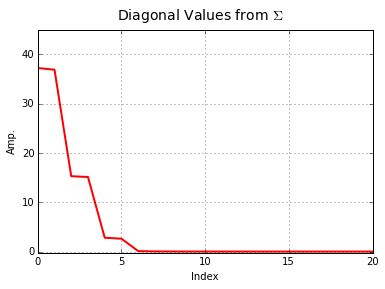

In [29]:
fig = plt.figure()
plt.plot(Sig, color='r', linewidth=2.0)
#
fig.suptitle('Diagonal Values from $\Sigma$', fontsize = 14)
plt.xlabel('Index')
plt.ylabel('Amp.')
plt.axis([0, 20, -0.25, 45])
#
plt.grid()

**Based on plot above for diagonal values $\Sigma$ there are only 6 significant values. Therefore, matrices A, B, C, D will be resized to following dimensions:**  

- A: 6 by 6
- B: 6 by 1
- C: 3 by 6
- D: 3 by 1

**Put all values of Sig on a diagonal:**

In [30]:
SigD = sp.diag(Sig)
display(SigD.shape)

(600, 600)

### Calculation of state matix A:

**Calculate discrete state matrix $A_d$:**

In [31]:
A_d = la.inv(sp.sqrt(SigD))@U.T@H1@V@la.inv(sp.sqrt(SigD))
display(A_d)
display(A_d.shape)

array([[  6.91717201e-01,  -7.18686292e-01,  -2.05065915e-03, ...,
          1.57841391e-06,   1.35672501e-06,   4.65931645e-07],
       [  7.21053122e-01,   6.90074142e-01,  -1.05974259e-02, ...,
         -2.43435441e-05,  -2.08263744e-05,  -7.29182710e-06],
       [ -2.48770695e-03,   3.96803750e-03,   3.34028219e-02, ...,
          1.04617251e-05,   8.95026632e-06,   3.14197616e-06],
       ..., 
       [ -6.04176947e-07,   9.11033529e-08,  -4.75305687e-07, ...,
         -6.20706900e-01,  -4.25096586e-01,  -2.14345701e-01],
       [ -1.34824483e-06,   2.02596095e-07,  -1.07534233e-06, ...,
         -1.11626586e+00,  -1.18422590e+00,  -4.27043444e-01],
       [ -7.31838796e-07,   1.10163818e-07,  -5.81581380e-07, ...,
         -7.30962228e-01,  -8.65266777e-01,  -2.28537584e-01]])

(600, 600)

**Calculate continuous state space matix A:**

In [32]:
A = la.logm(A_d)/dt
display(A.shape)

(600, 600)

**Because $\Sigma$ matrix has only 6 values that are significant the $A_d$ matrix is truncated to a 6 by 6 in order to proceed with the calculation of continuous state space matrix A.**

In [33]:
A_d=A_d[:6,:6]
display(A_d)
display(A_d.shape)

array([[  6.91717201e-01,  -7.18686292e-01,  -2.05065915e-03,
          1.87247324e-03,  -1.18049157e-03,   5.27952555e-04],
       [  7.21053122e-01,   6.90074142e-01,  -1.05974259e-02,
         -6.23596166e-04,  -6.39160444e-03,   3.36344399e-03],
       [ -2.48770695e-03,   3.96803750e-03,   3.34028219e-02,
          9.94216117e-01,  -1.47497917e-03,  -6.91667790e-04],
       [ -4.22504214e-03,  -2.15233443e-03,  -9.94550265e-01,
          3.41486550e-02,   1.53133191e-02,  -7.99917981e-03],
       [ -6.88371904e-04,   6.94756873e-04,  -1.60935302e-03,
         -6.50347634e-03,  -8.10576271e-01,  -5.51681886e-01],
       [  1.66435221e-04,   6.94641662e-04,   2.63258172e-03,
         -3.25494633e-03,   5.51657201e-01,  -8.09798816e-01]])

(6, 6)

**Calculate discrete eigenvectors and eigenvalues for $A_d$.**

In [34]:
lam_d, vec = la.eig(A_d)
print(lam_d)
print(vec)

[ 0.69090244+0.71988565j  0.69090244-0.71988565j  0.03376647+0.99441502j
  0.03376647-0.99441502j -0.81018504+0.55170013j -0.81018504-0.55170013j]
[[ -8.06230124e-04 -7.06515482e-01j  -8.06230124e-04 +7.06515482e-01j
    3.87662639e-03 -1.40978481e-03j   3.87662639e-03 +1.40978481e-03j
   -1.41903304e-03 +9.82513263e-04j  -1.41903304e-03 -9.82513263e-04j]
 [ -7.07692273e-01 +0.00000000e+00j  -7.07692273e-01 -0.00000000e+00j
    3.44125265e-03 -4.63969545e-03j   3.44125265e-03 +4.63969545e-03j
   -1.66510181e-03 +1.95436640e-03j  -1.66510181e-03 -1.95436640e-03j]
 [  3.26336639e-04 +1.99067820e-03j   3.26336639e-04 -1.99067820e-03j
    2.39230149e-04 -7.07017272e-01j   2.39230149e-04 +7.07017272e-01j
   -6.05093904e-03 +4.10022160e-03j  -6.05093904e-03 -4.10022160e-03j]
 [  1.59656175e-03 -2.14485887e-04j   1.59656175e-03 +2.14485887e-04j
    7.07151073e-01 +0.00000000e+00j   7.07151073e-01 -0.00000000e+00j
    3.35328041e-03 -5.79310811e-03j   3.35328041e-03 +5.79310811e-03j]
 [ -8.676

**Continuous eigenvalues.**

In [35]:
lam = sp.log(lam_d)/dt
lam

array([-0.00175360+0.63830389j, -0.00175360-0.63830389j,
       -0.00397937+1.21718778j, -0.00397937-1.21718778j,
       -0.01584685+2.01466011j, -0.01584685-2.01466011j])

### Natural frequencies and damping rations listed below closely match the experimental data:

In [36]:
# These are the continuous time eigenvalues
print('The undamped natural frequency #1 is {} Hz.'.format(abs(lam[0])/(2*sp.pi)))
#print('The undamped natural frequency is {} rad/sec.'.format(abs(lam[1])))
print('The undamped natural frequency #2 is {} Hz.'.format(abs(lam[2])/(2*sp.pi)))
#print('The undamped natural frequency is {} rad/sec.'.format(abs(lam[3])))
print('The undamped natural frequency #3 is {} Hz.'.format(abs(lam[4])/(2*sp.pi)))
#print('The undamped natural frequency is {} rad/sec.'.format(abs(lam[5])))
print()
print('The damping ratio for frequency #1 is {}.'.format(-sp.real(lam[0])/abs(lam[0])))
print('The damping ratio for frequency #2 is {}.'.format(-sp.real(lam[2])/abs(lam[2])))
print('The damping ratio for frequency #3 is {}.'.format(-sp.real(lam[4])/abs(lam[4])))

The undamped natural frequency #1 is 0.10158960314160134 Hz.
The undamped natural frequency #2 is 0.19372248670776668 Hz.
The undamped natural frequency #3 is 0.32065303434777764 Hz.

The damping ratio for frequency #1 is 0.002747263883696849.
The damping ratio for frequency #2 is 0.0032692973536889566.
The damping ratio for frequency #3 is 0.00786552344345458.


**Reshape continuous state matrix A:**

In [37]:
A = A[:6,:6]
#display(A)
display(A.shape)

(6, 6)

### Calculation of matrix B:

**Calculate discrete matrix $B_d$:**

In [38]:
B_d = sp.sqrt(SigD)@V.T[:,0].T.reshape((index2,1))
#B_d = sp.sqrt(SigD)@V.T[:,0]
#print(B_d)
display(B_d.shape)

(600, 1)

**Reshape matrix B to be a 6 by 1 matrix.**

In [39]:
B_d=B_d[:6,:]
display(B_d)
display(B_d.shape)

array([[-0.53940101],
       [ 0.16823701],
       [-0.46971849],
       [-0.02059511],
       [-0.2220331 ],
       [-0.11468421]])

(6, 1)

**Calculate continuous matrix B:**

In [40]:
B = la.solve((A_d - sp.eye(6)), A) @ B_d
print(B)
display(B.shape)

[[-0.35134392 +1.82254304e-05j]
 [ 0.29671647 -4.69568681e-05j]
 [-0.28637733 -3.30665965e-05j]
 [-0.29893591 +7.11878969e-05j]
 [-0.18740837 -4.09098480e-04j]
 [ 0.19227938 -1.24493477e-04j]]


(6, 1)

### Calculation of matrix C:

In [41]:
C = (U @ sp.sqrt(SigD))[:3,:]
#C=sp.array([C])
#print(C)
display(C.shape)

(3, 600)

**Reshape matrix C to be a 3 by 6.**

In [42]:
C=C[:,:6]
display(C)
display(C.shape)

array([[-0.49569734, -0.32857426, -0.54945583, -0.01085271, -0.4021282 ,
         0.21017585],
       [-0.57814589,  0.12735431, -0.00185896, -0.5459935 ,  0.44670416,
         0.05364705],
       [-0.30604675,  0.504858  ,  0.54221426, -0.0245271 , -0.34160568,
        -0.28660902]])

(3, 6)

### Calculation of matrix D:

In [43]:
D=M[:1,:3]
D=D.T
display(D)
display(D.shape)

array([[ 0.07125259],
       [-0.08974109],
       [-0.00021652]])

(3, 1)

In [44]:
#D=sp.array([[0, 0, 0]]).T
#display(D)
#display(D.shape)

### Construct the state space system from derived matrices

In [45]:
sys = ctrl.ss(A, B, C, D)
#sys

### Plot Identified Ho-Kalman System vs. Lab Data

In [46]:
def ssfrf(sys, omega_low, omega_high, in_index, out_index):
        A, B, C, D = ctrl.ssdata(sys)
        sa = A.shape[0]
        omega = sp.linspace(omega_low, omega_high,5000)
        H = omega* 1j
        i = 0
        for i in sp.arange(len(omega)):
            w = omega[i]
            H[i] = (C@la.solve(w*1j*sp.eye(sa)-A,B)+D)[out_index,in_index]
        return omega, H

**System plot for $H_{11}$ estimate:**

In [47]:
w, Hx1 = ssfrf(sys, 0, 3.0, 0, 0)

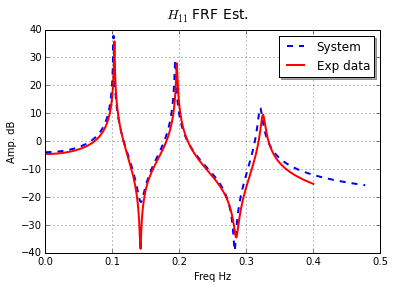

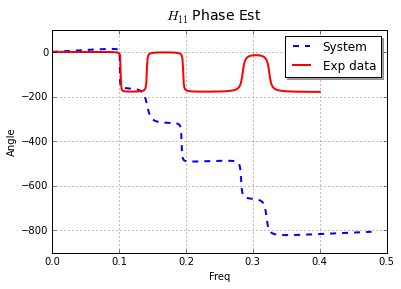

In [48]:
#Plot of H11 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx1)),'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,0])),'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{11}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_11 = sp.unwrap(sp.angle(Hx1))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_11, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_11, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{11}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

**System plot for $H_{12}$ estimate:**

In [49]:
w, Hx2 = ssfrf(sys, 0, 3, 0, 1)

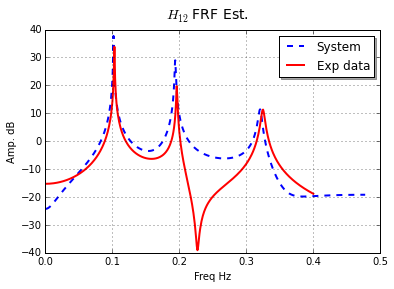

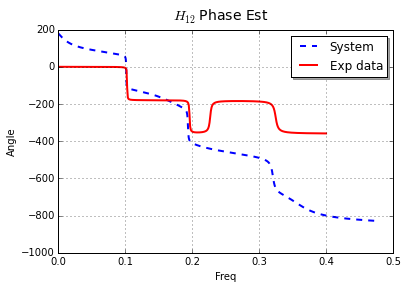

In [50]:
#Plot of H12 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx2)),'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,1])), 'r', linewidth=2.0,  label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{12}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_12 = sp.unwrap(sp.angle(Hx2))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_12, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_12, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{12}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

**System plot for $H_{13}$ estimate:**

In [51]:
w, Hx3 = ssfrf(sys, 0, 3, 0, 2)

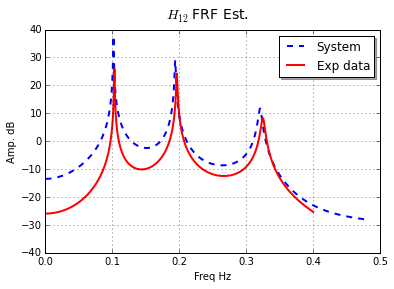

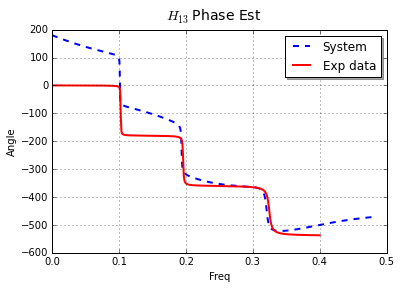

In [52]:
#Plot of H13 FRF
fig = plt.figure()
plt.plot(w/(2*sp.pi), 20*np.log10(abs(Hx3)), 'b--', linewidth=2.0, label='System')
plt.plot(Freq, 20*np.log10(abs(Recep[:,2])), 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{12}$ FRF Est.', fontsize = 14)
plt.xlabel('Freq Hz')
plt.ylabel('Amp. dB')
plt.axis([0, .5, -40, 40])
plt.grid()
plt.show()

#next plot phase diagram
sysP_13 = sp.unwrap(sp.angle(Hx3))*(180/sp.pi)
fig = plt.figure()
plt.plot(w/(2*sp.pi), sysP_13, 'b--', linewidth=2.0, label='System')
plt.plot(Freq, phase_13, 'r', linewidth=2.0, label='Exp data')
plt.legend(loc='upper right', shadow=True)
fig.suptitle('$H_{13}$ Phase Est', fontsize = 14)
plt.xlabel('Freq')
plt.ylabel('Angle')

plt.grid()
plt.show()

In [53]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')